# STATGR 5432, Project 1
 
# Finding the Pursuit of Happiness - EDA and NLP Analyses of HappyDB: A Corpus of 100,000 Crowdsourced Happy Moments

##### "True happiness is to enjoy the present, without anxious dependence upon the future..."
##### - Lucius Annaeus Seneca

In [65]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Part I: Which groups of people are behind the Happy Moments corpus? 

#### Before analyzing the happy moments themselves, it is important to identify the demographic information of those individuals who provided the happy moments. This will help us to better understand who exactly is contributing to the corpus, and will aid in helping ot make assumptions/inferences about the data. 

## We can begin by importing the data that comprises the corpus. 

In [66]:
import pandas as pd
df = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/cleaned_hm.csv'))
df.head(2)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection


In [67]:
df_sense = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/senselabel (2).csv'))
df_sense.head(2)

,hmid,tokenOffset,word,lowercaseLemma,POS,MWE,offsetParent,supersenseLabel
0,31526,1,I,i,PRON,O,0,NaN
1,31526,2,found,find,VERB,O,0,v.cognition


In [68]:
df_demo = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/demographic (1).csv'))
df_demo.head(2)


,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y


In [69]:
print(df_demo.shape)

(10844, 6)


### We will begin by removing Null values from the demographic data. 

In [70]:
df_demo_nonan = df_demo.dropna(how='any')

In [71]:
df_demo_nonan.shape

(10689, 6)

#### I will also import a separate dataframe for charting age demographcis, as manipulating some of the data was easier to perform in Excel.

In [72]:
df_demo_age = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/demo_age.csv'))

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Age Distribution')

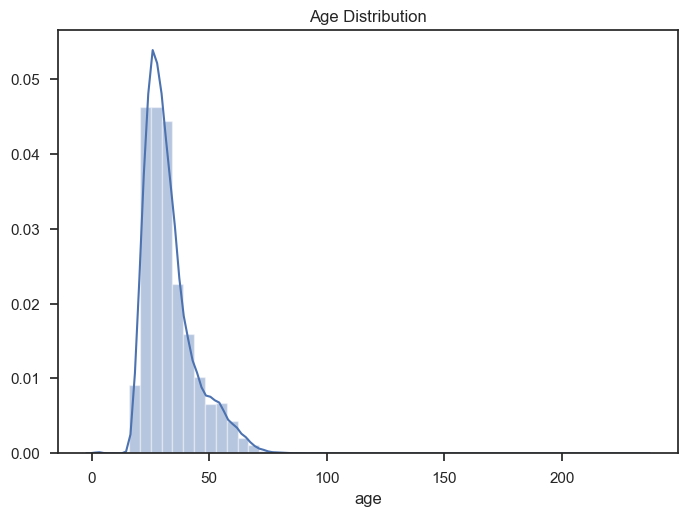

In [74]:
df_demo_age = df_demo_age.dropna()
sns.distplot(df_demo_age['age'])
plt.title('Age Distribution')

In [75]:
df_demo_nonan.head(2)

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y


In [76]:
import pandas_profiling

In [77]:
pandas_profiling.ProfileReport(df_demo_nonan)

Number of variables,7
Number of observations,10689
Total Missing (%),0.0%
Total size in memory,584.6 KiB
Average record size in memory,56.0 B
Numeric,1
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,1


## By using the Pandas Profiling tool, we get a much better understanding of the demographics of those individuals putting forth their happy moments. Key take aways are below: 

##### A. Slightly right skewed age distribution, with the mean centering around 25. 
##### B. Overwhelming majority of the individuals are American (~86%), followed by individuals who are Indian (9%).
##### C. Almost 50-50 split between males and females. 
##### D. Slightly above 50% of those individuals sampled are single, followed by ~40% of individuals who are married, lastly followed by ~5% of individuals who are divorced. 
##### E. ~60% of those sampled do not have children, while ~40% of those sampled do have children. 


## Part II: What observations can we make about individual's happy moments from a peripheral level?

#### Now that we have an understanding of those individuals whose happy moments comprise our corpus, it would be beneficial to identify certain facts about the happy moments themselves. 

#### The other two datasets provided in the analysis can provide us with this information. 

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Length of Happy Moment - Distribution')

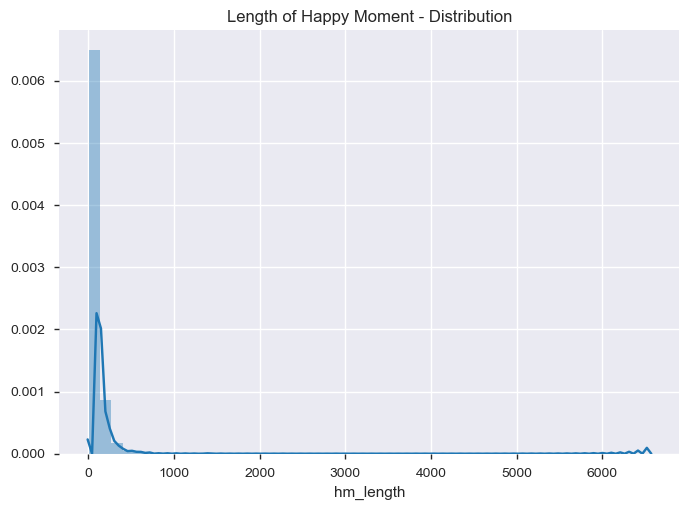

In [78]:
df['hm_length']  = df['cleaned_hm'].str.len()
sns.distplot(df['hm_length'])
plt.title('Length of Happy Moment - Distribution')

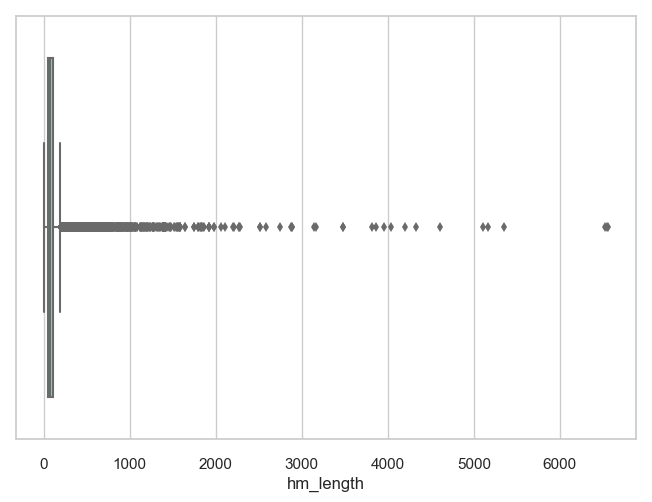

In [79]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="hm_length", hue="reflection_period",data=df, palette="Set3")

## From the above two distribution/box plot above, we see that the majority of happy moments are under 1000 words, closer to 0 words than 1000. There remain a several outliers that persist in the 2000-6000 word range. 

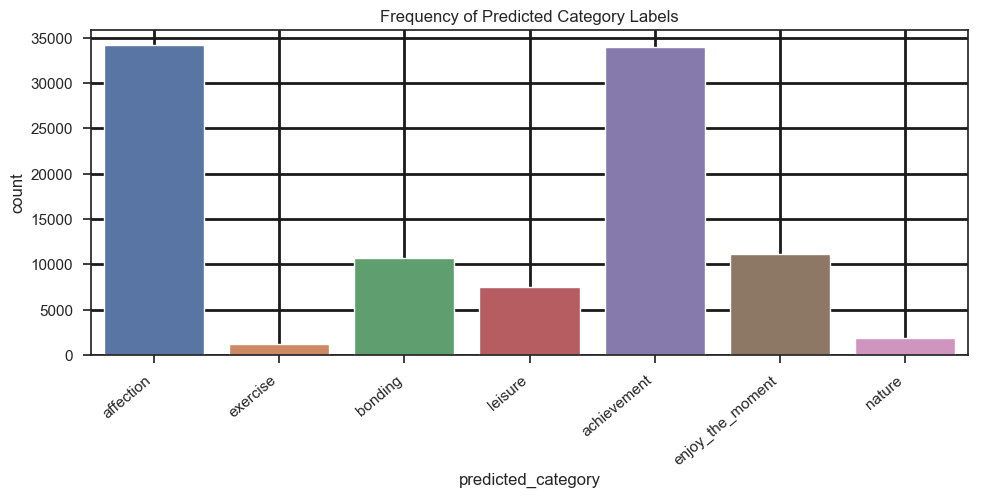

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

f, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="predicted_category", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_axisbelow(True)
plt.tight_layout()
plt.title("Frequency of Predicted Category Labels")
plt.grid(True, color='k', linestyle='-', linewidth=2)
plt.show()

### Another interesting observation that we can make is from the 'predicted_category' field taken from the cleaned_hm dataset. We see here that 'affection' and 'achievement' are by far the most predicted categories. These two are followed by 'bonding', 'enjoy_the_moment', and 'leisure'. 

##### 'nature' and 'exercise' by comparison, are the least predicted category label. 

Text(0.5,1,'Length of Happy Moment by Predicted Category')

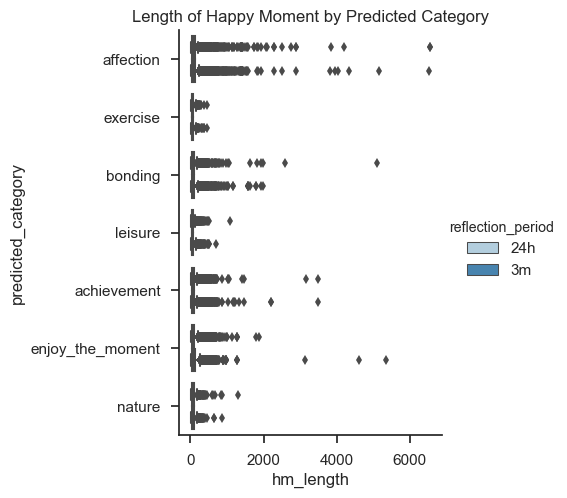

In [81]:
sns.catplot(x="hm_length", y="predicted_category",kind='box',hue='reflection_period', palette="Blues",data=df)
figsize=(50,50)
plt.title('Length of Happy Moment by Predicted Category')

## Analyzing the frequency of 'predicted_category' provides us with interesting insight. We can add a second layer to this analysis by comparing the frequency of 'predicted_category' with the length of the hm. 

## While the length of 'affection' matches that of what we would expect based on the previous chart, we notice that the length of achievement seems small compared to its frequency in the data. The length is highly similar to that of 'enjoy_the_moment' and 'bonding'.

Text(0.5,1,'Frequency of Different POS')

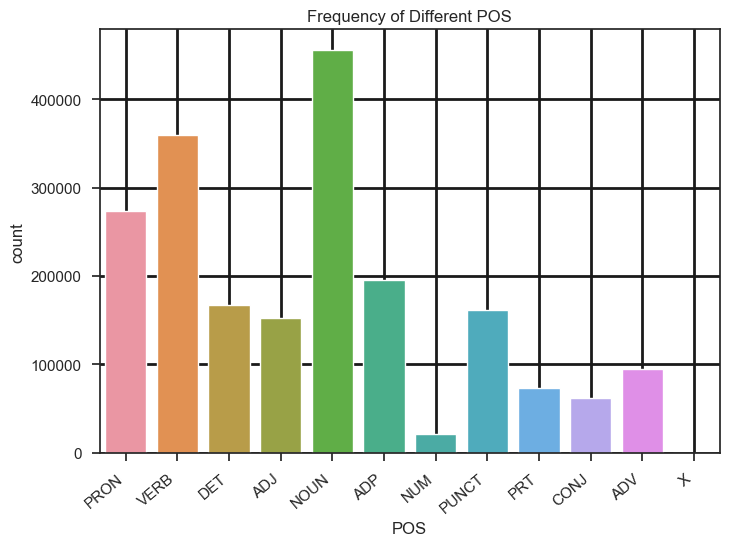

In [82]:
ax = sns.countplot(x="POS", data=df_sense)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.grid(True, color='k', linestyle='-', linewidth=2)
plt.title('Frequency of Different POS')

## From the above plot, we can see the frequencies of different POS throughout the dataset. Perhaps not surprisingly, 'Noun', 'Verb', and 'Pron' are the most frequent POS. This implies that people are happy when they interact with a state or object. Or conversely, when their interactions with other people involve states or objects. 

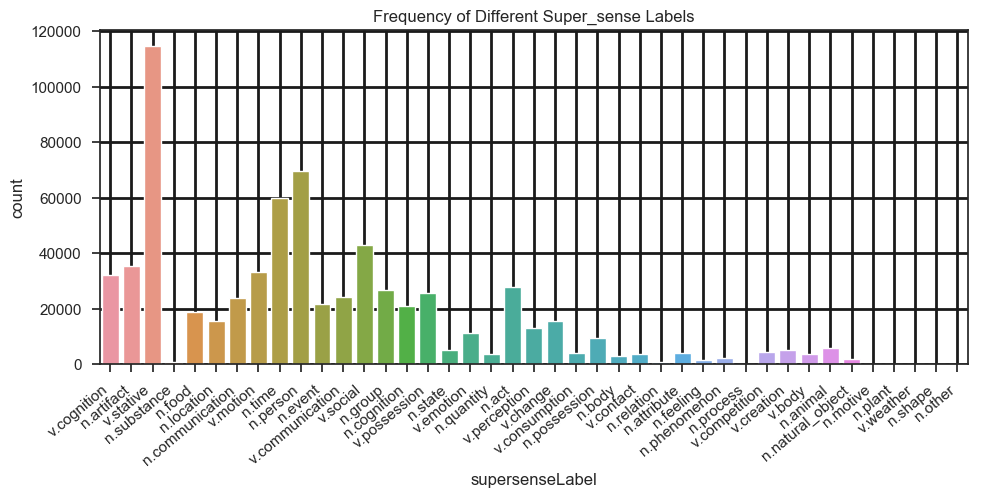

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

f, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="supersenseLabel", data=df_sense)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Frequency of Different Super_sense Labels")
plt.grid(True, color='k', linestyle='-', linewidth=2)
plt.show()

## Our observation from the above POS_histogram are confirmed by the supersenseLabel histogram depicted above. We see that 'v.stative', 'n.people', and 'n.time' contain the highest counts among all supersense labels. Moreover, we can infer that the most frequent happy moments involve spending time with other people aside from one's self, and that these actions entail a state of being/mind, rather than actions. 

## By looking at the plot however, we can also infer that 'v.motion' and 'n.act' are present as well, and are therefore not-trivial in comprising happy moments. 

## Now that we have analyzed the demographics behind the people who provided their happy moments and the actual happy moments themselves, we can try to algorithmically identify which happy moments are grouped together. 

## To accomplish this task, we can implement the below algorithms:

### A. TF_IDF Vectorization
### B. K_Means Clustering
### C. LDA Topic Modeling 

## Before we implement algorithms to analyze the textual data comprising the happy moments, we must first pre-process the text data. These steps entail:

### A. Turning all letters to lowercase
### B. Tokenizing the happy moments 
### C. Removing stop words from the happy moments 
### D. Lemmatizing the happy moments

In [84]:
import pandas as pd
df = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/cleaned_hm.csv'))


In [85]:
import string
df['cleaned_hm'] = [i.lower() for i in df['cleaned_hm']]
#new_list = [expression(i) for i in old_list if filter(i)]

In [86]:
df['cleaned_hm'] = [i.translate(string.punctuation) for i in df['cleaned_hm']]

In [87]:

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

def preprocess(sentence):
	sentence = sentence.lower()
	tokenizer = RegexpTokenizer(r'\w+')
	tokens = tokenizer.tokenize(sentence)
	filtered_words = [w for w in tokens if not w in stopwords.words('english')]
	return " ".join(filtered_words)

In [88]:
df_small = df[:10000]

In [89]:
df_small['cleaned_hm'] = [preprocess(x) for x in df_small['cleaned_hm']]

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()
df_small['cleaned_hm'] = [lemmatizer.lemmatize(word) for word in df_small['cleaned_hm']]

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [91]:
from nltk.tokenize import regexp_tokenize, wordpunct_tokenize, blankline_tokenize
lemma=nltk.stem.WordNetLemmatizer()

lemma_books = []
for book in df_small['cleaned_hm']:
    lemma_book = [lemma.lemmatize(word) for word in wordpunct_tokenize(book)]
    lemma_book = (' ').join(lemma_book)
    lemma_books.append(lemma_book)

## Now that the textual data has been preprocessed, we can proceed with our TF_IDF vectorization of the corpus. We will use sklearn's TfidfVectorizer to accomplish this task. 

#### Note: Grid searching for optimal parameters of these algorithms was out_of_scope for this study. 

In [92]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(lemma_books).toarray()
vocab = np.array(vectorizer.get_feature_names())
dtm.shape

(10000, 8323)

## By creating a dictionary of the vectorized featre names and vectorizer.idf, we can create a data frame that shows different scores for the vectorization. 

### Not surprisingly, happy, got, went, made, friend, were all some of the most frequently accounted for words in the vocabulary of the corpus. This contrasts with 'rainbow' and 'tulip', which were used much more infrequently. This seems appropriate given that these nouns do not occur frequently in everyday life. 

In [93]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [94]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
happy,2.605546
got,3.062095
made,3.077943
friend,3.264426
went,3.352926
time,3.452346
day,3.546031
work,3.551146
new,3.624269
today,3.806866


In [95]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
willpower,9.517293
durian,9.517293
hasnat,9.517293
comparatively,9.517293
zealously,9.517293
awkward,9.517293
yessica,9.517293
neonate,9.517293
unplanned,9.517293
realization,9.517293


In [96]:
from sklearn.decomposition import TruncatedSVD

In [97]:
n_comp=7

In [98]:
vz_sample = vectorizer.fit_transform(list(lemma_books))

## We can plot our vectorized corpus using the Truncated SVD and TSNE models (set to two components for a 2-d view). 7 components were chosen given that there are 7 predicted cateogry labels. 

In [99]:
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(vz_sample)


In [100]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)

In [101]:
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.009s...
[t-SNE] Computed neighbors for 10000 samples in 0.678s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.011768
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.753502
[t-SNE] Error after 500 iterations: 1.664916


In [102]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file
output_notebook()

plot_tfidf = bp.figure(plot_width=700, plot_height=600,
                       title="tf-idf clustering of the item description",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)


Loading BokehJS ...

In [103]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])

In [104]:
tfidf_df['description'] = lemma_books

In [105]:
plot_tfidf.scatter(x='x', y='y', source=tfidf_df, alpha=0.7)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"description": "@description"}
show(plot_tfidf)

## Using the bokeh library, we can develop a visualization of a scatter plot showing each happy moment and it's description. This algorithm does a decent job in separating each happy moment into clusters. For instance, in the upper right hand corner, we can identify that the cluster is associated with acquiring new items. By looking at the leftmost cluster, we identify that the clusters are associated with individuals traveling to a locaiton or "went to _________".

## We see that the TF_IDF algorithm had decent success in separating happy moments into similar moments based on the scatter plot. 

## But can we do better? The below cells detail the use of the MiniBatchKmeans algorithm to cluster our happy moments together. This time, we used 13 clusters as the results were semantically better than the 7 used previously. 

In [106]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 13 # need to be selected wisely
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters,
                               init='k-means++',
                               n_init=1,
                               init_size=1000, batch_size=1000, verbose=0, max_iter=1000)

In [107]:
kmeans = kmeans_model.fit(vz_sample)
kmeans_clusters = kmeans.predict(vz_sample)
kmeans_distances = kmeans.transform(vz_sample)
# reduce dimension to 2 using tsne
tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.009s...
[t-SNE] Computed neighbors for 10000 samples in 2.245s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.004672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.209496
[t-SNE] Error after 500 iterations: 1.624581


In [108]:
#combined_sample.reset_index(drop=True, inplace=True)
kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
kmeans_df['cluster'] = kmeans_clusters
kmeans_df['description'] = tfidf_df['description']

#kmeans_df['cluster']=kmeans_df.cluster.astype(str).astype('category')

In [109]:
plot_kmeans = bp.figure(plot_width=700, plot_height=600,
                        title="KMeans clustering of the description",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [110]:
label_color_map = {0:'lightgrey',
                1:'lightcoral',
                2:'sandybrown',
                3:'papayawhip',
                4:'lemonchiffon',
                5:'darkkhaki',
                6:'yellow',
                7:'greenyellow',
                8:'lightgreen',
                9:'aquamarine',
                10:'darkkhaki',
                11:'deepskyblue',
                12:'dodgerblue',
                13:'navy',
                14:'blueviolet'}




#### label colors here: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

In [111]:
label_color = [label_color_map[l] for l in kmeans_model.labels_] 

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from bokeh.models import HoverTool, DatetimeTickFormatter,ColumnDataSource
source = ColumnDataSource(data=dict(x=kmeans_df['x'], y=kmeans_df['y'],
                                    #color=colormap[kmeans_clusters],
                                    color=label_color,
                                    description=kmeans_df['description'],
                                    cluster=kmeans_df['cluster']))

plot_kmeans.scatter(x='x', y='y', color='color', source=source)
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"description": "@description"}
show(plot_kmeans)

## We can see that the Kmeans algorithm does a much better job in clearly separating the happy moments to those that are similar to it. The clusters are color coded and are clearly separable. For instance, the grey cluster is closely associated with 'accomplishing a task', whereas the bottom turquoise cluster is associated with the intersection of work and family life.  

## By looking at the descriptions, we can observe that the Kmeans algorithm significantly takes into account verbs when clustering the data. i.e. made, went. 

### Below, we see words associated with the first 12 clusters. 

In [113]:
common_words = kmeans_model.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(vocab[word] for word in centroid))

0 : favorite, watched, game, show, played, team, video, tv, movie, playing
1 : friend, old, best, happy, birthday, met, time, year, seen, made
2 : able, happy, day, time, today, good, found, son, dog, really
3 : lost, pound, weight, found, scale, thought, weighed, week, stepped, diet
4 : made, happy, work, day, today, feel, dinner, month, wife, hour
5 : got, work, happy, job, today, good, last, time, promotion, see
6 : finished, project, work, working, week, book, reading, day, happy, month
7 : came, home, visit, friend, work, happy, uncle, grandma, bright, grandpa
8 : daughter, school, happy, first, made, old, time, day, got, year
9 : lunch, ate, delicious, favorite, good, restaurant, dinner, friend, food, today
10 : went, movie, shopping, friend, temple, walk, time, gym, happy, long
11 : new, bought, got, car, job, happy, purchased, house, brought, buy
12 : family, parent, dinner, member, went, go, nice, great, day, time


## Lastly, we can implement a LDA topic model to see if it performs better than our Kmeans clustering. 

## For this analysis, 9 topics were chosen as this number generated more clearly seprable topics than 7 as used in Tf_idf, and 13 as used in Kmeans. 

In [114]:
from sklearn.decomposition import LatentDirichletAllocation

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model

no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(lemma_books)
tf_feature_names = tf_vectorizer.get_feature_names()

In [116]:
no_topics = 9

lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [117]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(topic_idx)
        print([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])

In [118]:
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

0
['able', 'work', 'feeling', 'told', 'today', 'week', 'day', 'happy', 'book', 'felt']
1
['family', 'got', 'dinner', 'favorite', 'time', 'work', 'went', 'job', 'movie', 'received']
2
['happy', 'moment', 'month', 'make', 'hour', 'feel', 'past', 'day', 'thing', 'got']
3
['life', 'happiness', 'office', 'big', 'help', 'sleep', 'seeing', 'people', 'way', 'good']
4
['new', 'happy', 'home', 'came', 'bought', 'got', 'saw', 'gave', 'house', 'mother']
5
['nice', 'birthday', 'son', 'played', 'girlfriend', 'class', 'kid', 'evening', 'went', 'daughter']
6
['friend', 'got', 'time', 'happy', 'game', 'yesterday', 'old', 'good', 'best', 'event']
7
['finally', 'getting', 'night', 'car', 'money', 'got', 'parent', 'finished', 'delicious', 'week']
8
['went', 'daughter', 'morning', 'time', 'day', 'dog', 'took', 'lunch', 'husband', 'love']


In [119]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      13.700534        1       1  0.085496  0.118857
2      13.405858        1       2  0.069606 -0.102132
8      13.270835        1       3  0.081223  0.109498
4      12.463304        1       4  0.124253 -0.006523
6      11.976327        1       5  0.073405  0.102517
3       8.960567        1       6 -0.409841  0.140476
5       8.893758        1       7  0.081914  0.144040
7       8.793898        1       8 -0.127883 -0.254980
0       8.534919        1       9  0.021827 -0.251753, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
324   Default  1039.000000        friend  1039.000000  30.0000  30.0000
378   Default  2231.000000         happy  2231.000000  29.0000  29.0000
568   Default   725.000000           new   725.000000  28.0000  28.0000
10    Default   519.000000          able   519.000000  27.0000  27.0000
980   Default   814.000000          work   814.000000  26.0000  26.0000
479   Default   405.000000          life   405.000000  25.0000  25.0000
543   Default   431.000000        moment   431.000000  24.0000  24.0000
570   Default   334.000000          nice   334.000000  23.0000  23.0000
301   Default   299.000000       finally   299.000000  22.0000  22.0000
335   Default   290.000000       getting   290.000000  21.0000  21.0000
546   Default   454.000000         month   454.000000  20.0000  20.0000
967   Default   969.000000          went   969.000000  19.0000  19.0000
286   Default   407.000000        family   407.000000  18.0000  18.0000
572   Default   382.000000         night   382.000000  17.0000  17.0000
291   Default   293.000000      favorite   293.000000  16.0000  16.0000
210   Default   379.000000      daughter   379.000000  15.0000  15.0000
377   Default   224.000000     happiness   224.000000  14.0000  14.0000
332   Default   253.000000          game   253.000000  13.0000  13.0000
223   Default   392.000000        dinner   392.000000  12.0000  12.0000
350   Default  1222.000000           got  1222.000000  11.0000  11.0000
548   Default   391.000000       morning   391.000000  10.0000  10.0000
898   Default   928.000000          time   928.000000   9.0000   9.0000
402   Default   487.000000          home   487.000000   8.0000   8.0000
409   Default   325.000000          hour   325.000000   7.0000   7.0000
92    Default   234.000000        bought   234.000000   6.0000   6.0000
440   Default   246.000000           job   246.000000   5.0000   5.0000
510   Default   326.000000          make   326.000000   4.0000   4.0000
604   Default   231.000000          past   231.000000   3.0000   3.0000
116   Default   189.000000           car   189.000000   2.0000   2.0000
230   Default   239.000000           dog   239.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
229    Topic9    58.902598        doctor    59.771331   2.4464  -4.5479
209    Topic9    55.968330          date    56.835889   2.4456  -4.5990
683    Topic9    52.086236       reading    52.953865   2.4445  -4.6709
603    Topic9    44.407363        passed    45.296241   2.4412  -4.8304
238    Topic9    42.763148         drink    43.636272   2.4408  -4.8681
149    Topic9    41.527286       cleaned    42.395444   2.4403  -4.8975
734    Topic9    41.842849       running    42.724088   2.4402  -4.8899
166    Topic9    54.531139      complete    55.689193   2.4400  -4.6250
312    Topic9    40.504582        flower    41.372106   2.4398  -4.9224
780    Topic9    43.341797          sick    44.299266   2.4392  -4.8547
845    Topic9    39.052190  successfully    39.919555   2.4390  -4.9589
471    Topic9    39.437052         leave    40.315713   2.4390  -4.9491
825    Topic9    38.375799          stay    39.255599   2.4383  -4.9764
459    Topic9    35.453946          late    36.3214

## As seen in the above interactive bubble plot, the LDA model performs well in separating the happy moments into distinct topics. For instance, topic 5 is associated with games and competition, while topics 7-9 are associated with exercise and the outdoors. 

## However, given that the model has a difficult time clearly separating topics 1-3, which comprise the largest percentage of the vocabulary in the corpus, it is safe to say that the Kmeans clustering performs the best in terms of grouping happy moments together. 

In [120]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from subprocess import check_output

In [121]:
df_small_a = df_small
cleaned_hm_a = [str(i) for i in df_small_a['cleaned_hm']]

In [122]:
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(df_small_a['cleaned_hm']))

In [123]:
wordcloud = WordCloud(width = 15000, height = 2000, 
                background_color ='grey',max_words=100,  
                min_font_size = 10).generate(letters_only)

## The word cloud below helps us to close out thisn project! Thanks for your time and attention!

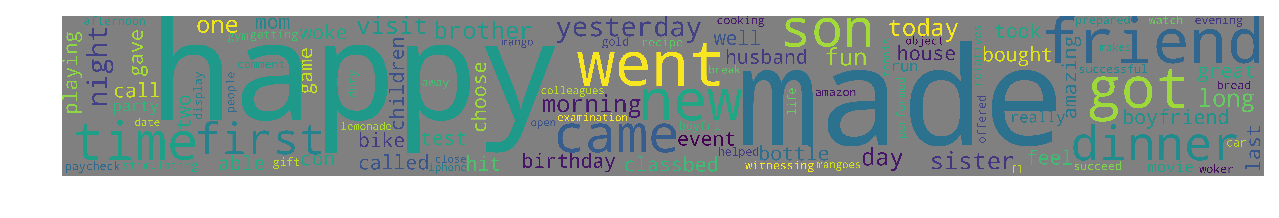

In [124]:
print(wordcloud)
fig = plt.figure(1)
fig.set_size_inches(15.5, 7.5)
#fig.savefig('test2png.png', dpi=100)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()